In [19]:
from sklearn.datasets import load_digits
digits = load_digits()
print(type(digits))

<class 'sklearn.utils.Bunch'>


In [20]:
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [21]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [22]:
print(type(digits.data))
print(digits.data.shape)
print(digits.target.shape)

<class 'numpy.ndarray'>
(1797, 64)
(1797,)


In [23]:
print(digits.data[0].shape)
print(digits.data[0])

(64,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [24]:
print(type(digits.images[0]))
print(digits.images[0].shape)
print(digits.images[0])

<class 'numpy.ndarray'>
(8, 8)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<Figure size 432x288 with 0 Axes>

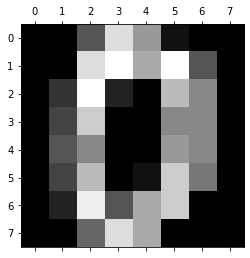

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

In [26]:
print(digits.target_names)
print(digits.target)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 ... 8 9 8]


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.40)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(1078, 64) (1078,) (719, 64) (719,)


In [38]:
print("X_Train")
print(X_train[:3])
print("X_Test")
print(X_test[:3])

X_Train
[[ 0.  0.  6. 15. 15.  4.  0.  0.  0.  6. 16. 16. 16. 14.  0.  0.  0.  7.
  16. 14. 16. 13.  0.  0.  0.  0.  3.  7. 16.  6.  0.  0.  0.  0.  0.  2.
  16.  9.  0.  0.  0.  0.  0.  0. 14. 15.  0.  0.  0.  0.  7. 10. 16. 14.
   0.  0.  0.  0.  7. 15. 15.  4.  0.  0.]
 [ 0.  0.  3. 12.  5.  0.  0.  0.  0.  1. 15. 14. 16.  6.  0.  0.  0.  6.
  16.  0.  6. 16.  6.  0.  0.  5. 16. 11. 14. 16.  4.  0.  0.  0.  8. 10.
  12. 16.  0.  0.  0.  0.  1.  1.  7. 15.  1.  0.  0.  0.  8. 10. 10. 16.
   2.  0.  0.  0.  2. 13. 14.  7.  0.  0.]
 [ 0.  0.  3. 13. 14.  4.  0.  0.  0.  0. 15.  8.  7. 11.  0.  0.  0.  0.
  16.  0.  0. 11.  3.  0.  0.  0. 10.  6. 14. 14.  1.  0.  0.  0.  5. 16.
  14.  1.  0.  0.  0.  0. 12. 10.  8. 12.  0.  0.  0.  0. 14.  3.  0.  9.
   8.  0.  0.  0.  4. 14. 15. 12.  4.  0.]]
X_Test
[[ 0.  0.  4. 13. 14. 16.  3.  0.  0.  0.  6. 11. 10. 16.  1.  0.  0.  0.
   0.  0.  7. 14.  0.  0.  0.  0.  9. 16. 16. 16. 12.  0.  0.  0. 15. 13.
  16.  7.  2.  0.  0.  0.  0.  8. 12.  0.

In [39]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000,
                                           multi_class='multinomial')

In [40]:
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

LogisticRegression score: 0.963839


C:\Users\Dharma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
ypred_test= logistic.predict(X_test)
print(ypred_test)

[7 5 7 3 5 9 4 9 8 3 4 6 8 0 3 9 8 8 8 9 0 4 9 4 7 1 8 9 8 3 8 2 4 1 8 1 7
 9 7 4 0 6 7 9 7 3 0 8 8 9 7 2 8 5 7 3 0 2 6 9 6 6 3 1 7 9 2 8 2 6 0 3 7 7
 5 7 0 2 5 4 4 4 4 9 6 5 5 1 0 4 3 1 0 7 2 0 9 7 0 5 4 6 2 1 9 2 3 9 0 5 5
 1 8 8 9 4 9 3 2 9 9 3 4 5 0 7 4 5 4 5 3 5 8 6 5 2 1 3 4 2 5 5 7 0 2 2 6 9
 9 5 0 1 2 9 4 2 0 6 8 6 2 4 4 8 8 4 7 6 8 1 0 2 8 9 8 2 5 4 1 9 7 3 5 5 0
 6 4 9 3 0 4 4 1 3 4 0 0 6 7 6 6 5 8 7 4 4 8 5 2 7 9 1 2 9 8 6 0 7 4 3 6 1
 4 2 1 5 0 3 3 1 7 6 6 0 2 2 5 1 2 1 1 3 2 1 9 2 1 2 8 9 4 8 6 9 6 8 3 7 0
 7 5 5 4 7 4 4 2 3 2 5 4 7 8 2 1 6 8 7 2 0 6 7 0 8 3 6 6 6 8 3 9 1 3 6 6 0
 7 8 2 3 5 4 8 9 5 2 1 5 2 4 9 5 7 2 6 7 6 1 7 0 3 2 0 9 3 9 3 1 1 5 5 9 6
 8 0 9 1 6 6 7 8 3 8 2 4 2 2 6 6 6 6 1 7 4 2 5 9 2 0 8 3 5 5 1 5 1 7 6 8 9
 1 0 3 4 1 0 7 7 4 8 5 6 9 7 5 0 6 1 3 5 7 0 0 4 9 3 5 5 1 8 7 6 6 5 8 9 0
 1 1 7 4 1 8 8 2 0 8 7 2 2 3 8 5 8 8 5 8 6 1 1 2 9 4 7 8 1 2 3 5 7 4 4 0 9
 7 9 3 0 7 5 5 0 6 7 0 7 7 9 2 1 7 9 1 5 1 9 2 5 3 7 4 8 3 8 5 7 2 0 2 2 7
 8 3 2 8 8 1 1 0 7 3 6 4 

In [42]:
print(y_test)

[7 5 7 8 5 9 4 9 8 3 4 6 8 0 3 9 8 8 8 9 0 4 9 4 7 1 8 9 8 3 3 2 4 1 8 1 7
 9 7 4 0 6 7 9 7 3 0 8 8 9 7 2 8 5 7 3 0 2 6 9 6 6 3 1 7 9 2 8 2 6 0 3 7 7
 5 7 0 2 5 4 4 4 4 9 6 5 5 1 0 4 3 1 0 7 2 0 9 7 0 5 4 6 2 1 9 8 3 9 0 5 5
 1 8 8 9 4 9 3 2 9 9 3 4 5 0 7 4 5 4 5 3 5 8 6 5 2 1 3 4 2 5 5 7 0 2 2 6 9
 9 5 0 1 2 9 4 2 0 6 8 6 2 4 4 8 4 4 7 6 8 1 0 2 8 9 8 2 3 4 1 9 7 3 5 5 0
 6 4 9 9 0 4 4 1 3 4 0 0 6 7 6 6 5 8 7 4 4 8 5 2 7 1 1 2 9 8 6 0 7 4 3 6 1
 4 2 1 5 0 3 3 1 7 6 6 0 2 2 5 1 2 1 1 3 2 1 9 2 1 2 8 9 8 8 6 9 6 8 3 7 0
 7 5 5 4 7 4 4 2 3 2 5 4 7 8 2 1 6 8 7 2 0 6 7 0 8 3 6 6 6 8 3 9 1 3 6 6 0
 7 8 2 3 5 4 8 5 5 2 1 5 2 4 9 5 7 2 6 7 6 1 7 0 3 2 0 9 3 9 3 1 1 5 5 9 6
 8 0 9 1 6 6 7 8 3 8 2 4 2 2 6 6 6 6 1 7 4 2 5 9 2 0 8 3 5 5 1 5 1 7 6 8 5
 8 0 3 4 1 0 4 7 4 8 5 6 9 7 5 0 6 1 3 5 7 0 0 4 9 3 5 5 1 8 7 6 6 5 3 9 0
 1 1 7 4 1 8 8 2 0 8 7 2 2 3 8 5 8 8 5 8 6 1 1 2 9 5 7 8 1 2 3 5 7 4 4 0 9
 7 1 3 0 7 5 5 0 6 7 0 7 7 9 2 1 7 9 1 5 2 9 2 5 3 7 4 8 3 8 5 7 2 0 2 2 7
 8 3 2 8 8 1 1 0 7 3 6 4 

In [43]:
for i in range(len(y_test)):
    if (y_test[i] != ypred_test[i]):
        print(i, y_test[i], ypred_test[i])

3 8 3
30 3 8
105 8 2
164 4 8
176 3 5
188 9 3
210 1 9
250 8 4
303 5 9
369 5 9
370 8 1
376 4 7
404 3 8
432 5 4
445 1 9
464 2 1
502 7 9
543 3 8
549 6 1
572 3 5
595 8 6
602 3 5
612 5 9
669 9 5
670 8 5
694 5 6


In [44]:
print("classes", logistic.classes_)
print("Total feature weights", logistic.coef_.shape)
print("Total Bias weights", logistic.intercept_.shape) 
print("Total iterations", logistic.n_iter_) 

classes [0 1 2 3 4 5 6 7 8 9]
Total feature weights (10, 64)
Total Bias weights (10,)
Total iterations [1000]


In [45]:
ypred_logproba= logistic.predict_log_proba(X_test[0:2])
print(ypred_logproba)
ypred_proba= logistic.predict_proba(X_test[0:2])
print(ypred_proba)

[[-2.35872636e+01 -1.62617429e+01 -2.41310139e+01 -1.65661883e+01
  -1.43629440e+01 -1.46932399e+01 -2.73936150e+01 -1.43335301e-04
  -1.27640446e+01 -8.87874837e+00]
 [-1.34324156e+01 -3.09179928e+01 -2.65599574e+01 -1.41815461e+01
  -2.65184234e+01 -3.83700920e-06 -1.33441899e+01 -2.27099939e+01
  -1.67110662e+01 -1.77690716e+01]]
[[5.70402701e-11 8.66193206e-08 3.31156902e-11 6.38845500e-08
  5.78432472e-07 4.15725791e-07 1.26795597e-12 9.99856675e-01
  2.86184347e-06 1.39318432e-04]
 [1.46681729e-06 3.73668379e-14 2.91848236e-12 6.93478149e-07
  3.04225101e-12 9.99996163e-01 1.60210868e-06 1.37143419e-10
  5.52683074e-08 1.91862569e-08]]


In [46]:
help (logistic)

Help on LogisticRegression in module sklearn.linear_model._logistic object:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', '

# Exercises
Find best model using Logistic Regression algorithm with the following instructions?
•	Use wine dataset (load_wine)
•	Use data pre-processing with data standardization
•	Use train test split – 75 %– 25%
•	Select best subset of features using co-relations and note down accuracy? 

# Find best model using Logistic Regression algorithm with the following instructions?
•	Use wine dataset (load_wine)
•	Use train test split – 70 %– 30%
•	Print accuracies for various regularization hyperparameter values:  Try penalty with none, l1, l2 & elasticnet?

# Find best model using Logistic Regression algorithm with the following instructions?
•	Use iris dataset (load_iris)
•	Use train test split – 70 %– 30%
•	Print accuracies for various regularization hyperparameter values:  Try penalty with none, l1, l2 & elasticnet?